In [145]:
# Import necessary libraries: numpy, scipy
import numpy as np
import matplotlib.pyplot as plt
import scipy
import lmfit

In [146]:
# The next experiment in the sequence, and the first experiment where we address 
# the qubit itself, is called "Qubit Spectroscopy".

# We have calibrated the resonator to a point where we can distinguish between the
# bare resonator frequency (as measured in Resonator Spectroscopy) and the
# resonator frequency in the dispersive regime (as in Punch Out)

# Recall that the shape of the resonance in frequency space depends on the state of
# the qubit.
# If we measure the response from the resonator when we send a signal at the frequency
# corresponding to the dispersive resonator frequency (i.e. the dip in Punch Out)
# we will obtain a low response value when the qubit is in the ground state.
# When the qubit is excited, however, the resonance will shift, and we will obtain a
# high response value. 

# To mimic the response in a real experiment, we will use arbitrary voltage values to
# represent these two response states, such as 0.2 V and 0.5 V.

# Recall that the low value, 0.2 V, will be measured when the qubit is in the ground state,
# and the high value 0.5 V, will be measured when the qubit is in the excited state.

# This method of measurement, where we interrogate the resonator rather than the qubit
# directly, is called DISPERSIVE measurement. It is a method of indirect measurement,
# and if we have calibrated the amplitude of the readout pulse correctly, 
# the measurement does not have any effect on the qubit (except for projecting it, i.e.
# measuring it)

In [ ]:
# These parameters are used for the simulation.
SIMULATION_LOW_V = 0.2 # V
SIMULATION_HIGH_V = 0.5 # V
SIMULATION_QUBIT_FREQUENCY = 7 # GHz
SIMULATION_PULSE_BROADENING = 0.01 # GHz
SIMULATION_NOISE_SCALE = 0.1

In [148]:
# The shape of a qubit peak usually looks like a lorentzian distribution.
def lorentzian_distribution(x, amplitude, x0, hwhm):
    """A lorentzian distribution.

    See https://docs.mantidproject.org/v6.5.0/fitting/fitfunctions/Lorentzian.html

    :param x: input parameter, e.g. frequency.
    :param amplitude: Peak height.
    :param x0: centre of the peak.
    :param hwhm: Half width at half maximum.
    """

    return (amplitude / np.pi) * ((hwhm) / (((x - x0) ** 2 ) + (hwhm ** 2)))

In [149]:
def measure_qubit(frequency_axis: list[float], averages: int):
    """Transform a set of drive frequencies into a response from the qubit.

    :param frequency_axis: List of frequency values to test.
    """
    qubit_probability_distribution = lorentzian_distribution(
        frequency_axis, 0.1, SIMULATION_QUBIT_FREQUENCY, SIMULATION_PULSE_BROADENING)
    
    response = []
    for i in range(averages):
        resp_axis = []
        for val in qubit_probability_distribution:
            rng = np.random.random_sample()
            if val < rng:
                resp_axis.append(SIMULATION_LOW_V + np.random.random_sample()*SIMULATION_NOISE_SCALE)
            else:
                resp_axis.append(SIMULATION_HIGH_V + np.random.random_sample()*SIMULATION_NOISE_SCALE)
        response.append(resp_axis)

    return response

In [150]:
# We can define our experiment in terms of these parameters:
# The parameter we are sweeping this time is still a frequency value, but here
# it is the DRIVE frequency, not the RESONATOR frequency.
# This is a different signal, sent via a different cable, to a different port on
# the chip.
# The RESONATOR frequency is fixed, and not simulated here.
# Let's say we have been told to expect that the qubit frequency is about 7 GHz:
start = 6.5
stop = 7.5
num_points = 100

# Since the qubit can project only to |0> or |1> (or leakage states), to obtain a 
# clear distribution we should average the experiment over many shots.
# Try setting this to 1, and see how the data looks. How about 2? 10? 100? 1000?
averages = 100

# generate the frequency values:
frequency_axis = np.linspace(start, stop, num_points)

In [151]:
# Now we send this instruction to the qubit. We do this multiple times (the parameter
# `averages`) and obtain the response.
response = measure_qubit(frequency_axis, averages)

In [ ]:
# Note that the response is a 2D array (or a list of lists). 
# To obtain the average response, we take the mean.
avg_response = np.mean(response, axis=0)

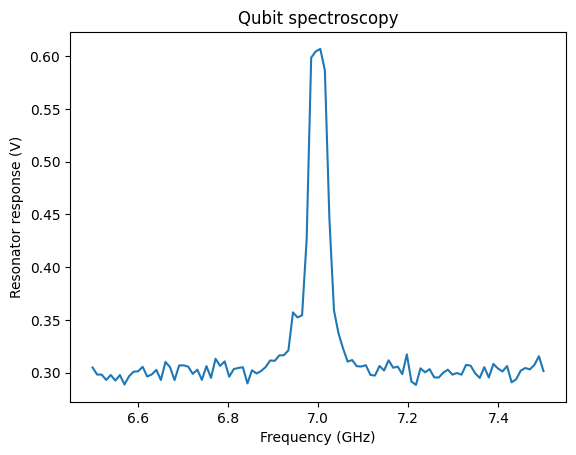

In [153]:
# Now we can plot this and see what it looks like:
plt.figure()
plt.plot(frequency_axis, avg_response)
plt.ylabel('Resonator response (V)')
plt.xlabel('Frequency (GHz)')
plt.title(f'Qubit spectroscopy')
plt.show()

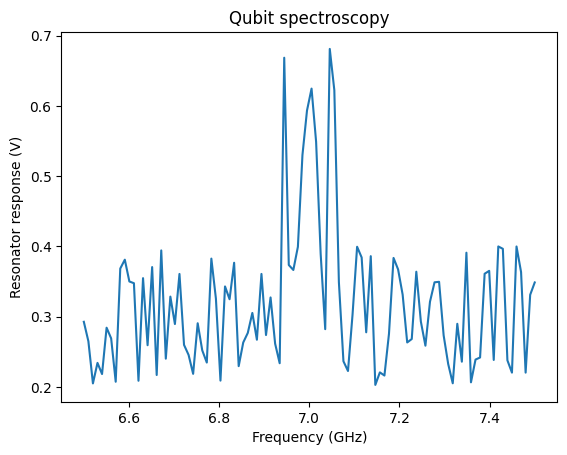

In [ ]:
# We can also plot a single trace from the above graph to see what the single-shot
# results look like.

plt.figure()
plt.plot(frequency_axis, response[0])
plt.ylabel('Resonator response (V)')
plt.xlabel('Frequency (GHz)')
plt.title(f'Qubit spectroscopy')
plt.show()

# The noise we see here is from disturbances in the resonator lines.
# But you can see that there are two regimes: one where we mostly measure 